## Assignment for Week 1 - Introduction to Machine Learning

We will use the heart.disease.data file, which has 15 attributes and 1 target variable.  Prepare the data for machine learning tasks use in later weeks.
**Dataset**
- UCI Riverside Heart Disease dataset, which has 15 attributes and 1 target variable
- http://archive.ics.uci.edu/ml/datasets/heart+Disease (Use the data sourced in the Week 1 Content folder)


**Objective:** Prepare the real-world dataset for machine learning.

**Goals:**
- Conduct meaningful exploratory data analysis (EDA)
- Drop unnecessary columns and deal with outliers (if needed), and justify your decision to do so in a markdown cell
- Impute missing data and justify how and why you imputed the data in a markdown cell.
- Provide a brief summary of how you prepared your data for future analysis in a markdown cell.

**Deliverables:**
Upload your completed notebook .ipynb file

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [22]:
# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Load the dataset
df = pd.read_csv('heart.disease.data.csv')
print(f"Dataset shape: {df.shape}")
print(f"\nColumn names: {list(df.columns)}")

# Display basic information about the dataset
print("Dataset Info:")
print(df.info())
print("\n" + "="*50)
print("\nFirst few rows:")
df.head()

# Statistical summary
print("Statistical Summary:")
df.describe()

Dataset shape: (282, 16)

Column names: ['age', 'sex', 'cp', 'trestbps', 'chol', 'cigs', 'years', 'fbs', 'dm', 'famhist', 'restecg', 'thalach', 'exang', 'thal', 'slope', 'num']
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       282 non-null    int64
 1   sex       282 non-null    int64
 2   cp        282 non-null    int64
 3   trestbps  282 non-null    int64
 4   chol      282 non-null    int64
 5   cigs      282 non-null    int64
 6   years     282 non-null    int64
 7   fbs       282 non-null    int64
 8   dm        282 non-null    int64
 9   famhist   282 non-null    int64
 10  restecg   282 non-null    int64
 11  thalach   282 non-null    int64
 12  exang     282 non-null    int64
 13  thal      282 non-null    int64
 14  slope     282 non-null    int64
 15  num       282 non-null    int64
dtypes: int64(16)
memory usage: 35.4 K

,age,sex,cp,trestbps,chol,cigs,years,fbs,dm,famhist,restecg,thalach,exang,thal,slope,num
count,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000
mean,54.411348,0.677305,3.163121,131.563830,249.092199,16.460993,14.829787,0.148936,-8.184397,0.620567,1.014184,149.765957,0.326241,4.581560,1.599291,0.907801
std,9.053083,0.468338,0.955405,17.757496,51.217546,19.580300,15.564563,0.356658,2.741802,0.486108,0.998118,22.923869,0.469670,2.248467,0.619148,1.224894
min,29.000000,0.000000,1.000000,94.000000,126.000000,-9.000000,-9.000000,0.000000,-9.000000,0.000000,0.000000,71.000000,0.000000,-9.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,0.000000,-9.000000,0.000000,0.000000,133.250000,0.000000,3.000000,1.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,244.000000,10.000000,15.000000,0.000000,-9.000000,1.000000,2.000000,153.500000,0.000000,3.000000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,277.000000,30.000000,30.000000,0.000000,-9.000000,1.000000,2.000000,165.750000,1.000000,7.000000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,99.000000,54.000000,1.000000,1.000000,1.000000,2.000000,202.000000,1.000000,7.000000,3.000000,4.000000


In [23]:
# Check for missing values (including -9 which appears to be used as missing data indicator)
print("Missing Values Analysis:")
print("\nStandard missing values:")
print(df.isnull().sum())

print("\nValues coded as -9 (likely missing):")
for col in df.columns:
    neg_nine_count = (df[col] == -9).sum()
    if neg_nine_count > 0:
        print(f"{col}: {neg_nine_count} values ({neg_nine_count/len(df)*100:.1f}%)")

Missing Values Analysis:

Standard missing values:
age         0
sex         0
cp          0
trestbps    0
chol        0
cigs        0
years       0
fbs         0
dm          0
famhist     0
restecg     0
thalach     0
exang       0
thal        0
slope       0
num         0
dtype: int64

Values coded as -9 (likely missing):
cigs: 5 values (1.8%)
years: 5 values (1.8%)
dm: 259 values (91.8%)
thal: 2 values (0.7%)


In [24]:
# Check unique values for each column to understand the data better
print("\n" + "="*50)
print("\nUnique values per column:")
for col in df.columns:
    unique_vals = df[col].unique()
    if len(unique_vals) <= 10:
        print(f"{col}: {sorted(unique_vals)}")
    else:
        print(f"{col}: {len(unique_vals)} unique values (range: {unique_vals.min()} - {unique_vals.max()})")



Unique values per column:
age: 41 unique values (range: 29 - 77)
sex: [np.int64(0), np.int64(1)]
cp: [np.int64(1), np.int64(2), np.int64(3), np.int64(4)]
trestbps: 48 unique values (range: 94 - 200)
chol: 145 unique values (range: 126 - 564)
cigs: 23 unique values (range: -9 - 99)
years: 38 unique values (range: -9 - 54)
fbs: [np.int64(0), np.int64(1)]
dm: [np.int64(-9), np.int64(1)]
famhist: [np.int64(0), np.int64(1)]
restecg: [np.int64(0), np.int64(1), np.int64(2)]
thalach: 90 unique values (range: 71 - 202)
exang: [np.int64(0), np.int64(1)]
thal: [np.int64(-9), np.int64(3), np.int64(6), np.int64(7)]
slope: [np.int64(1), np.int64(2), np.int64(3)]
num: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4)]


In [25]:
# Target variable analysis
print("Target Variable (num) Distribution:")
target_counts = df['num'].value_counts().sort_index()
print(target_counts)
print(f"\nPercentage distribution:")
print((target_counts / len(df) * 100).round(1))

# Create binary target (0 = no disease, 1+ = disease)
df['target_binary'] = (df['num'] > 0).astype(int)
print(f"\nBinary target distribution:")
print(df['target_binary'].value_counts())
print(f"Disease prevalence: {df['target_binary'].mean():.1%}")

Target Variable (num) Distribution:
num
0    157
1     50
2     31
3     32
4     12
Name: count, dtype: int64

Percentage distribution:
num
0    55.7
1    17.7
2    11.0
3    11.3
4     4.3
Name: count, dtype: float64

Binary target distribution:
target_binary
0    157
1    125
Name: count, dtype: int64
Disease prevalence: 44.3%


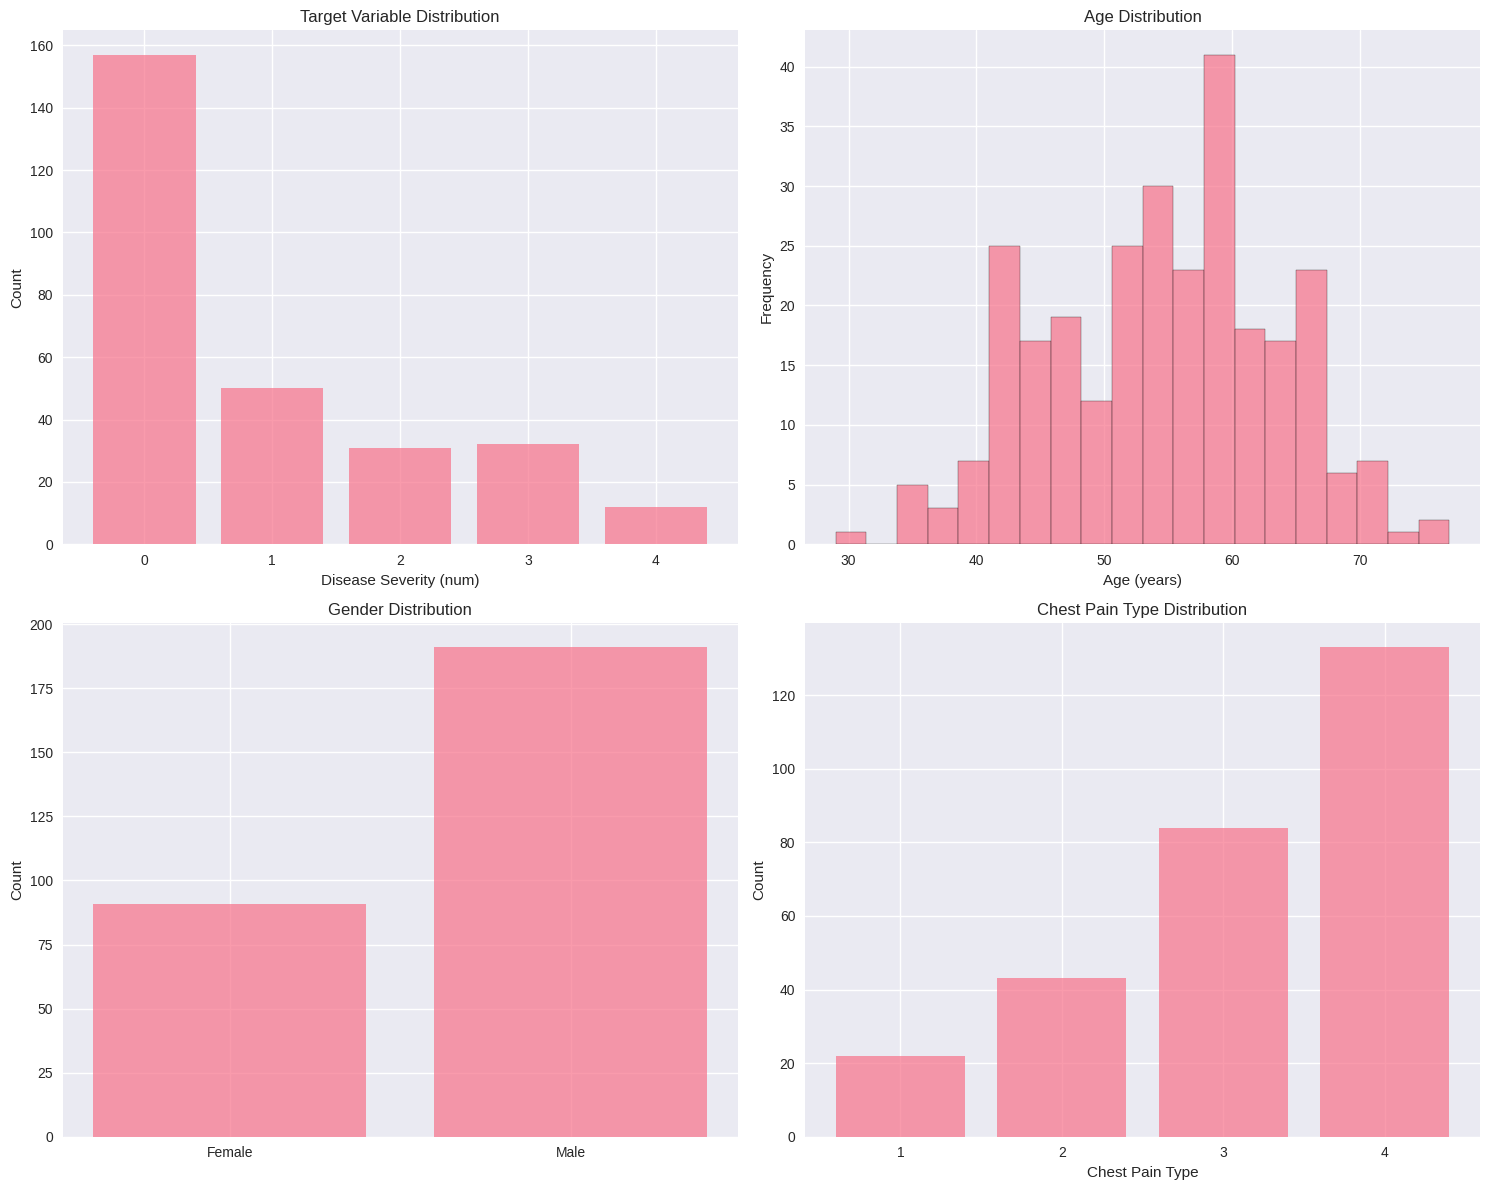

In [26]:
# Visualizations for EDA
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Target distribution
axes[0,0].bar(target_counts.index, target_counts.values, alpha=0.7)
axes[0,0].set_title('Target Variable Distribution')
axes[0,0].set_xlabel('Disease Severity (num)')
axes[0,0].set_ylabel('Count')

# Age distribution
axes[0,1].hist(df['age'], bins=20, alpha=0.7, edgecolor='black')
axes[0,1].set_title('Age Distribution')
axes[0,1].set_xlabel('Age (years)')
axes[0,1].set_ylabel('Frequency')

# Gender distribution
gender_counts = df['sex'].value_counts()
gender_labels = ['Female', 'Male']
axes[1,0].bar(gender_labels, [gender_counts[0], gender_counts[1]], alpha=0.7)
axes[1,0].set_title('Gender Distribution')
axes[1,0].set_ylabel('Count')

# Chest pain type distribution
cp_counts = df['cp'].value_counts().sort_index()
cp_labels = ['Typical Angina', 'Atypical Angina', 'Non-anginal Pain', 'Asymptomatic']
axes[1,1].bar(range(1, 5), cp_counts.values, alpha=0.7)
axes[1,1].set_title('Chest Pain Type Distribution')
axes[1,1].set_xlabel('Chest Pain Type')
axes[1,1].set_ylabel('Count')
axes[1,1].set_xticks(range(1, 5))

plt.tight_layout()
plt.show()

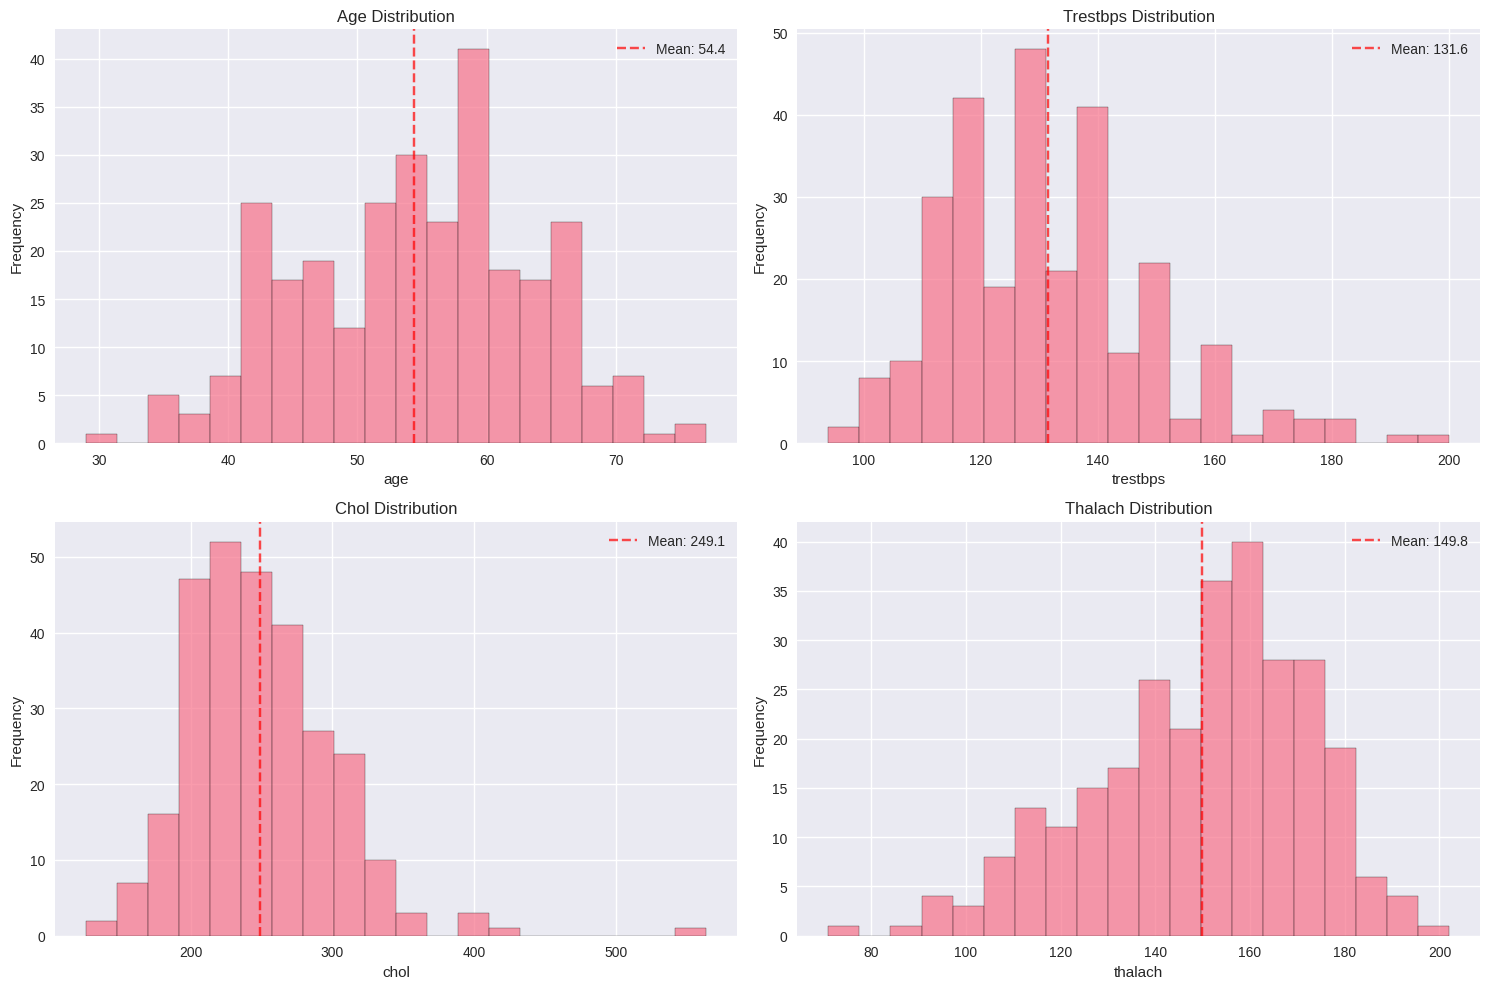

In [27]:
# Continuous variables analysis
continuous_vars = ['age', 'trestbps', 'chol', 'thalach']
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for i, var in enumerate(continuous_vars):
    # Filter out -9 values for visualization
    data = df[df[var] != -9][var]

    axes[i].hist(data, bins=20, alpha=0.7, edgecolor='black')
    axes[i].set_title(f'{var.title()} Distribution')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frequency')

    # Add mean line
    axes[i].axvline(data.mean(), color='red', linestyle='--', alpha=0.7, label=f'Mean: {data.mean():.1f}')
    axes[i].legend()

plt.tight_layout()
plt.show()

age: 0 potential outliers (beyond 28.5 - 80.5)
trestbps: 9 potential outliers (beyond 90.0 - 170.0)
chol: 5 potential outliers (beyond 117.0 - 373.0)
thalach: 1 potential outliers (beyond 84.5 - 214.5)


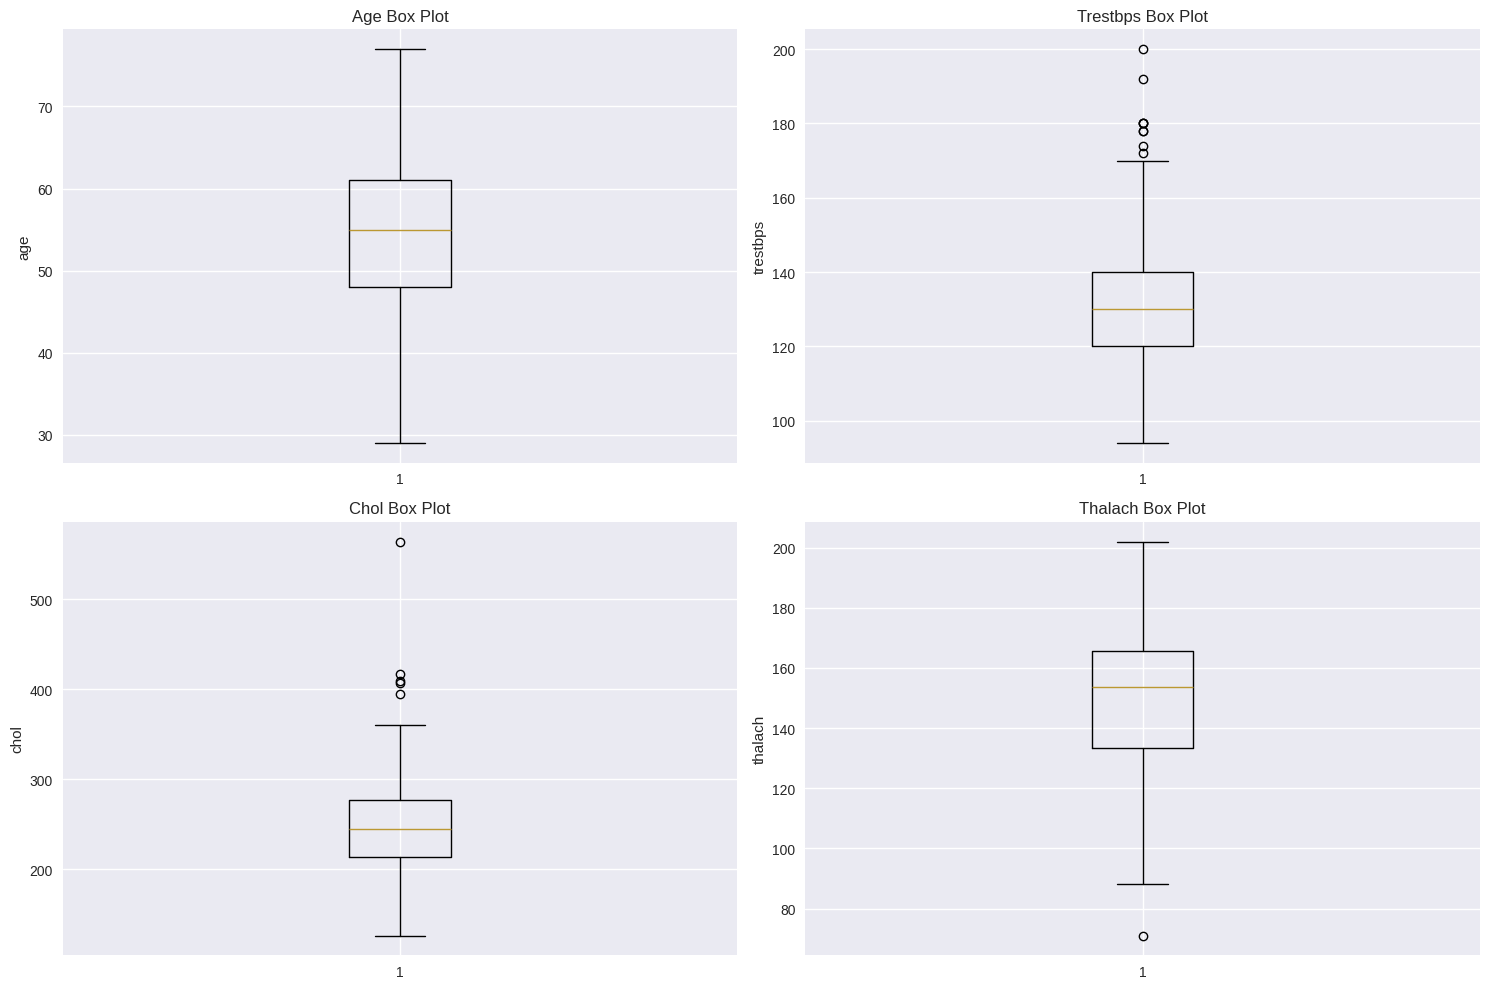

In [28]:
# Box plots to identify outliers
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for i, var in enumerate(continuous_vars):
    # Filter out -9 values for visualization
    data = df[df[var] != -9]

    axes[i].boxplot(data[var])
    axes[i].set_title(f'{var.title()} Box Plot')
    axes[i].set_ylabel(var)

    # Identify potential outliers using IQR method
    Q1 = data[var].quantile(0.25)
    Q3 = data[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[var] < lower_bound) | (data[var] > upper_bound)]
    print(f"{var}: {len(outliers)} potential outliers (beyond {lower_bound:.1f} - {upper_bound:.1f})")

plt.tight_layout()
plt.show()

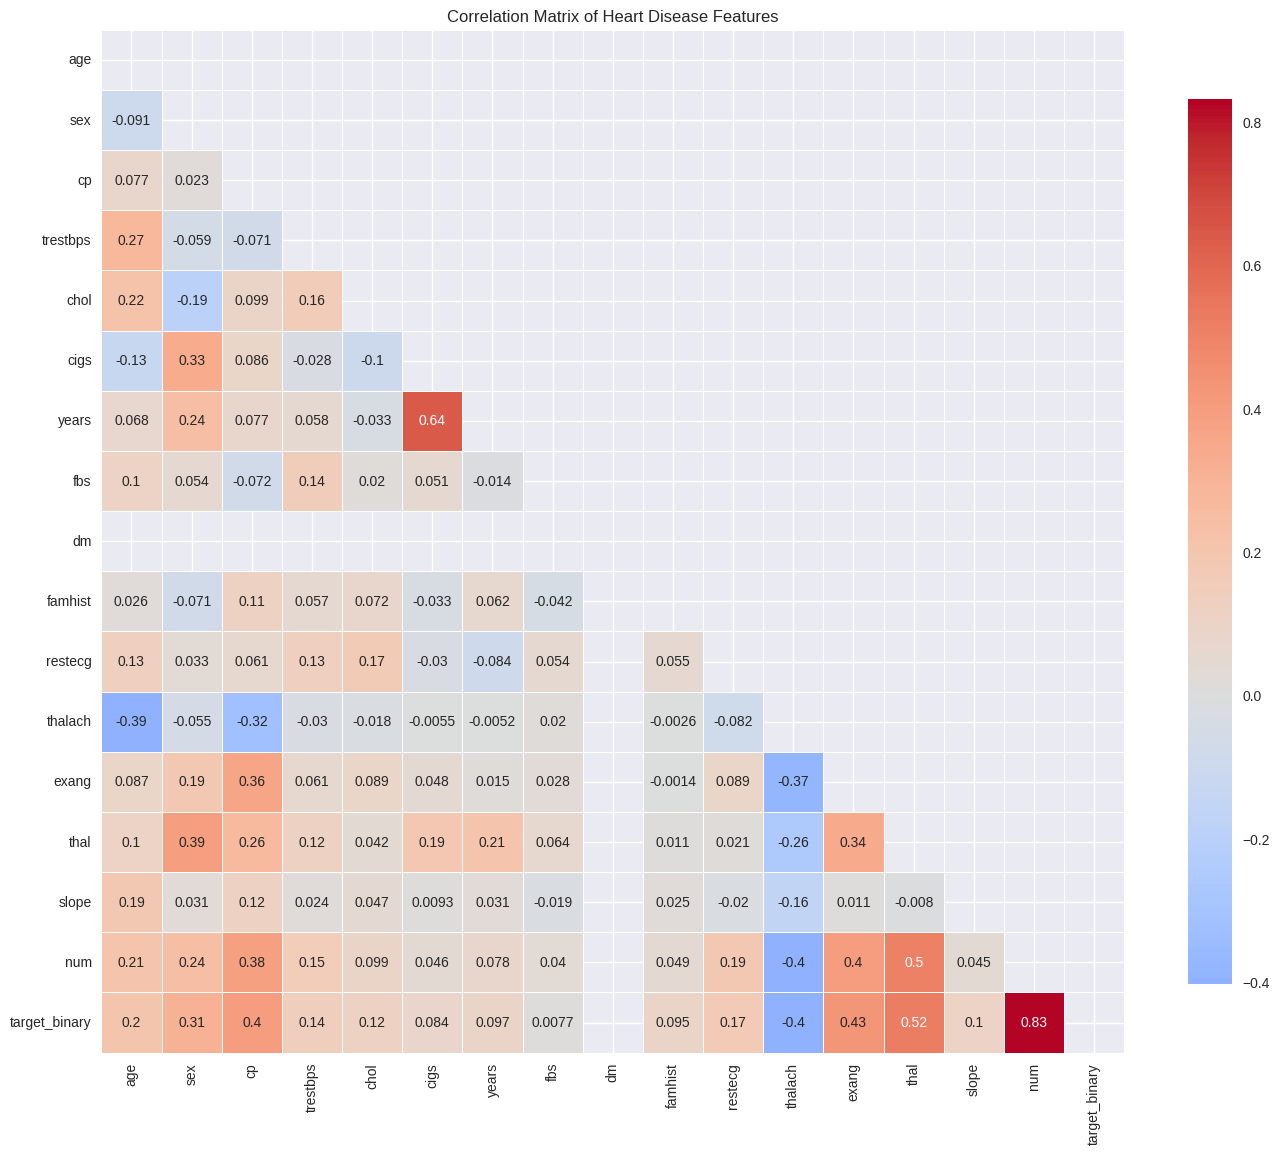

In [29]:
# Correlation analysis (excluding missing values coded as -9)
# Create a copy of the dataframe for correlation analysis
df_corr = df.copy()

# Replace -9 with NaN for correlation calculation
df_corr = df_corr.replace(-9, np.nan)

# Calculate correlation matrix
correlation_matrix = df_corr.corr()

# Plot heatmap
plt.figure(figsize=(14, 12))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Heart Disease Features')
plt.tight_layout()
plt.show()

Correlations with target variable (num):
num              1.000000
target_binary    0.832067
thal             0.504393
exang            0.398880
thalach          0.396194
cp               0.383891
sex              0.239516
age              0.210747
restecg          0.187365
trestbps         0.151776
Name: num, dtype: float64
Smoking Data Analysis:
Cigarettes per day - valid values: 277
Years smoking - valid values: 277

Cases with both smoking variables: 276


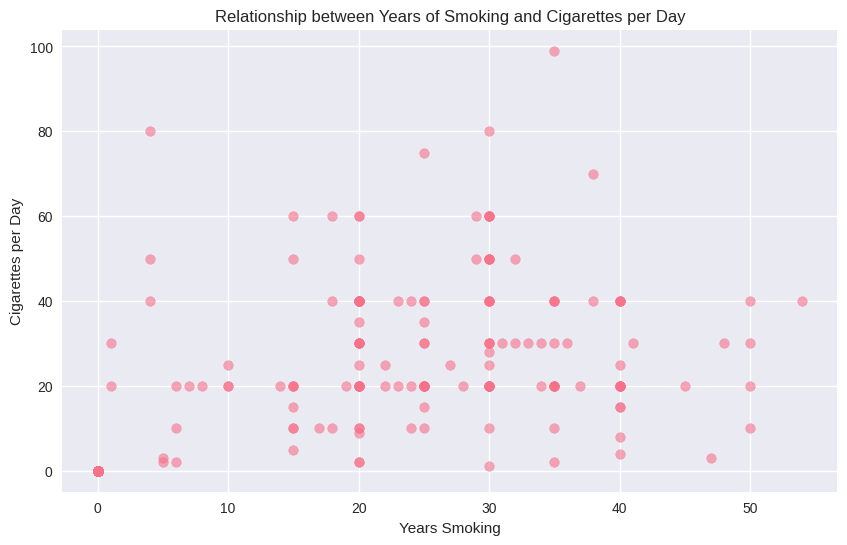

Correlation between cigarettes and years: 0.642


In [30]:
# Show strongest correlations with target variable
print("Correlations with target variable (num):")
target_corr = correlation_matrix['num'].abs().sort_values(ascending=False)
print(target_corr.head(10))

# Analysis of smoking-related variables
print("Smoking Data Analysis:")
print(f"Cigarettes per day - valid values: {(df['cigs'] != -9).sum()}")
print(f"Years smoking - valid values: {(df['years'] != -9).sum()}")

# Look at the relationship between cigarettes and years for valid data
smoking_data = df[(df['cigs'] != -9) & (df['years'] != -9)]
print(f"\nCases with both smoking variables: {len(smoking_data)}")

if len(smoking_data) > 0:
    plt.figure(figsize=(10, 6))
    plt.scatter(smoking_data['years'], smoking_data['cigs'], alpha=0.6)
    plt.xlabel('Years Smoking')
    plt.ylabel('Cigarettes per Day')
    plt.title('Relationship between Years of Smoking and Cigarettes per Day')
    plt.show()

    # Check correlation
    corr = smoking_data['cigs'].corr(smoking_data['years'])
    print(f"Correlation between cigarettes and years: {corr:.3f}")

In [31]:
# Create outlier flags for key continuous variables
def flag_outliers_iqr(series, multiplier=1.5):
    """Flag outliers using IQR method"""
    # Only calculate for non-missing values
    valid_data = series[series != -9]
    Q1 = valid_data.quantile(0.25)
    Q3 = valid_data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR

    # Return outlier flags (True for outliers, False for normal values, NaN for missing)
    outlier_flags = ((series < lower_bound) | (series > upper_bound)) & (series != -9)
    return outlier_flags

# Create outlier flags
df_processed = df.copy()

for var in ['age', 'trestbps', 'chol', 'thalach']:
    df_processed[f'{var}_outlier'] = flag_outliers_iqr(df_processed[var])
    outlier_count = df_processed[f'{var}_outlier'].sum()
    print(f"{var}: {outlier_count} outliers flagged ({outlier_count/len(df)*100:.1f}%)")

print(f"\nDataset shape with outlier flags: {df_processed.shape}")

age: 0 outliers flagged (0.0%)
trestbps: 9 outliers flagged (3.2%)
chol: 5 outliers flagged (1.8%)
thalach: 1 outliers flagged (0.4%)

Dataset shape with outlier flags: (282, 21)


In [32]:
# Implement imputation strategy
print("Implementing Data Imputation Strategy...")
print("\nBefore imputation:")
missing_summary = {}
for col in ['cigs', 'years', 'dm', 'thal']:
    missing_count = (df_processed[col] == -9).sum()
    missing_summary[col] = missing_count
    print(f"{col}: {missing_count} missing values")

# Create missing indicators
for col in ['cigs', 'years', 'dm', 'thal']:
    df_processed[f'{col}_missing'] = (df_processed[col] == -9).astype(int)

# Impute missing values
# For smoking variables: assume missing = non-smoker (0)
df_processed['cigs'] = df_processed['cigs'].replace(-9, 0)
df_processed['years'] = df_processed['years'].replace(-9, 0)

# For diabetes: use mode (most common value)
dm_mode = df_processed[df_processed['dm'] != -9]['dm'].mode()[0]
df_processed['dm'] = df_processed['dm'].replace(-9, dm_mode)
print(f"\nDiabetes imputed with mode: {dm_mode}")

Implementing Data Imputation Strategy...

Before imputation:
cigs: 5 missing values
years: 5 missing values
dm: 259 missing values
thal: 2 missing values

Diabetes imputed with mode: 1


In [33]:
# For thal: use mode (most common value)
thal_mode = df_processed[df_processed['thal'] != -9]['thal'].mode()[0]
df_processed['thal'] = df_processed['thal'].replace(-9, thal_mode)
print(f"Thal imputed with mode: {thal_mode}")

print("\nAfter imputation:")
for col in ['cigs', 'years', 'dm', 'thal']:
    missing_count = (df_processed[col] == -9).sum()
    print(f"{col}: {missing_count} missing values")

print(f"\nMissing indicator variables created:")
missing_indicators = [col for col in df_processed.columns if col.endswith('_missing')]
for col in missing_indicators:
    print(f"{col}: {df_processed[col].sum()} cases flagged as originally missing")

# Verify no missing values remain
print("\nFinal missing value check:")
print(df_processed.isnull().sum().sum(), "missing values remaining")
print("No -9 values remaining:", (df_processed == -9).sum().sum())

Thal imputed with mode: 3

After imputation:
cigs: 0 missing values
years: 0 missing values
dm: 0 missing values
thal: 0 missing values

Missing indicator variables created:
cigs_missing: 5 cases flagged as originally missing
years_missing: 5 cases flagged as originally missing
dm_missing: 259 cases flagged as originally missing
thal_missing: 2 cases flagged as originally missing

Final missing value check:
0 missing values remaining
No -9 values remaining: 0


In [34]:
# Feature engineering: Create additional meaningful variables
print("Creating additional features...")

# Age groups
df_processed['age_group'] = pd.cut(df_processed['age'],
                                 bins=[0, 40, 50, 60, 70, 100],
                                 labels=['<40', '40-49', '50-59', '60-69', '70+'])

# Risk score combining multiple factors
df_processed['risk_score'] = (df_processed['age'] >= 60).astype(int) + \
                           df_processed['sex'] + \
                           df_processed['dm'] + \
                           df_processed['famhist'] + \
                           (df_processed['cigs'] > 0).astype(int)

# Cholesterol categories
df_processed['chol_category'] = pd.cut(df_processed['chol'],
                                     bins=[0, 200, 240, 1000],
                                     labels=['Normal', 'Borderline', 'High'])

# Blood pressure categories
df_processed['bp_category'] = pd.cut(df_processed['trestbps'],
                                   bins=[0, 120, 140, 1000],
                                   labels=['Normal', 'Elevated', 'High'])

print(f"Dataset shape after feature engineering: {df_processed.shape}")
print(f"New categorical features created: {len(['age_group', 'chol_category', 'bp_category'])}")
print(f"New numerical features created: 1 (risk_score)")

Creating additional features...
Dataset shape after feature engineering: (282, 29)
New categorical features created: 3
New numerical features created: 1 (risk_score)


In [35]:
# Final data quality check
print("Final Data Quality Assessment:")
print(f"\nDataset shape: {df_processed.shape}")
print(f"Total missing values: {df_processed.isnull().sum().sum()}")
print(f"No -9 values remaining: {(df_processed == -9).sum().sum() == 0}")

# Display final dataset info
print("\nFinal dataset column summary:")
original_features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'cigs', 'years', 'fbs', 'dm',
                    'famhist', 'restecg', 'thalach', 'exang', 'thal', 'slope']
target_features = ['num', 'target_binary']
missing_indicators = [col for col in df_processed.columns if col.endswith('_missing')]
outlier_flags = [col for col in df_processed.columns if col.endswith('_outlier')]
engineered_features = ['age_group', 'chol_category', 'bp_category', 'risk_score']

print(f"Original features: {len(original_features)}")
print(f"Target variables: {len(target_features)}")
print(f"Missing indicators: {len(missing_indicators)}")
print(f"Outlier flags: {len(outlier_flags)}")
print(f"Engineered features: {len(engineered_features)}")
print(f"Total columns: {df_processed.shape[1]}")

Final Data Quality Assessment:

Dataset shape: (282, 29)
Total missing values: 0
No -9 values remaining: True

Final dataset column summary:
Original features: 15
Target variables: 2
Missing indicators: 4
Outlier flags: 4
Engineered features: 4
Total columns: 29


In [36]:
# Save the processed dataset
df_processed.to_csv('heart_disease_processed.csv', index=False)
print("Processed dataset saved as 'heart_disease_processed.csv'")

# Display final few rows to verify processing
print("\nFirst few rows of processed dataset:")
display(df_processed.head())

print("\nProcessed dataset summary statistics:")
display(df_processed[original_features].describe())

Processed dataset saved as 'heart_disease_processed.csv'

First few rows of processed dataset:


,age,sex,cp,trestbps,chol,cigs,years,fbs,dm,famhist,...,chol_outlier,thalach_outlier,cigs_missing,years_missing,dm_missing,thal_missing,age_group,risk_score,chol_category,bp_category
0,29,1,2,130,204,2,6,0,1,0,...,False,False,0,0,0,0,<40,3,Borderline,Elevated
1,34,1,1,118,182,20,6,0,1,0,...,False,False,0,0,1,0,<40,3,Normal,Normal
2,34,0,2,118,210,10,15,0,1,1,...,False,False,0,0,1,0,<40,3,Borderline,Normal
3,35,0,4,138,183,0,0,0,1,1,...,False,False,0,0,1,0,<40,2,Normal,Elevated
4,35,1,4,120,198,0,0,0,1,0,...,False,False,0,0,1,0,<40,2,Normal,Normal



Processed dataset summary statistics:


,age,sex,cp,trestbps,chol,cigs,years,fbs,dm,famhist,restecg,thalach,exang,thal,slope
count,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.0,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000
mean,54.411348,0.677305,3.163121,131.563830,249.092199,16.620567,14.989362,0.148936,1.0,0.620567,1.014184,149.765957,0.326241,4.666667,1.599291
std,9.053083,0.468338,0.955405,17.757496,51.217546,19.407450,15.363562,0.356658,0.0,0.486108,0.998118,22.923869,0.469670,1.937334,0.619148
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,71.000000,0.000000,3.000000,1.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,133.250000,0.000000,3.000000,1.000000
50%,55.000000,1.000000,3.000000,130.000000,244.000000,10.000000,15.000000,0.000000,1.0,1.000000,2.000000,153.500000,0.000000,3.000000,2.000000
75%,61.000000,1.000000,4.000000,140.000000,277.000000,30.000000,30.000000,0.000000,1.0,1.000000,2.000000,165.750000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,99.000000,54.000000,1.000000,1.0,1.000000,2.000000,202.000000,1.000000,7.000000,3.000000
